#How to Make your own OM10 sim input catalogs in 4 easy steps

In [1]:
%matplotlib inline
from __future__ import division
import om10,os
import numpy as np
import matplotlib.pyplot as plt
import triangle

#1. Load the OM10 pre-simulated lenses
Load the catalog of simulated lenses. Pandas interface between FITS tables and DataFrames only exists in the dev version of astropy, so use native astropy tables for now!

In [2]:
db = om10.DB(catalog='$OM10_DIR/data/qso_mock.fits')
print db.lenses

  LENSID  FLAGTYPE NIMG ZLENS VELDISP  ... SIGCRIT  DSLUM  L_I REFF REFF_T
--------- -------- ---- ----- -------- ... ------- ------- --- ---- ------
    14428        0    2 0.062 264.2409 ...     0.0 35956.6 0.0  0.0    0.0
    21703        0    2 0.072 165.1962 ...     0.0  8193.9 0.0  0.0    0.0
    31711        0    2 0.082 155.9553 ...     0.0 35956.6 0.0  0.0    0.0
    34331        0    2 0.084 172.5838 ...     0.0 14498.4 0.0  0.0    0.0
    51810        0    2 0.096 244.9063 ...     0.0 26239.2 0.0  0.0    0.0
    83414        0    2 0.114   154.17 ...     0.0 11904.1 0.0  0.0    0.0
   115074        0    2 0.128 113.5011 ...     0.0 7101.16 0.0  0.0    0.0
   125027        0    2  0.13 247.1724 ...     0.0 16302.5 0.0  0.0    0.0
   147709        0    2 0.138 200.9093 ...     0.0 17748.4 0.0  0.0    0.0
   180815        0    2 0.148 185.3532 ...     0.0 14029.4 0.0  0.0    0.0
   202550        0    4 0.154  181.134 ...     0.0 8794.67 0.0  0.0    0.0
      ...      ...  ...  

#2. Place lenses on sky
Read in positions, redshifts, and magnitudes of CFHTLS galaxies from file, then match with simulated lenses by nearest neighbor.

In [16]:
db.get_sky_positions(input_cat='$OM10_DIR/data/CFHTLS_LRGs.txt')
db.assign_sky_positions()

om10.DB: read in LRG sky position data from  /Users/mbaumer/pybin/OM10/data/CFHTLS_LRGs.txt
Mean LRG RA,DEC,z,i =  34.3807307408 -7.09643979181 0.612498 21.63331883
om10.DB: number of LRGs stored =  10000
15658


In [17]:
print db.lenses

  LENSID  FLAGTYPE NIMG ZLENS VELDISP  ... L_I REFF REFF_T   RA   DEC 
--------- -------- ---- ----- -------- ... --- ---- ------ ----- -----
    14428        0    2 0.062 264.2409 ... 0.0  0.0    0.0 -99.0 -99.0
    21703        0    2 0.072 165.1962 ... 0.0  0.0    0.0 -99.0 -99.0
    31711        0    2 0.082 155.9553 ... 0.0  0.0    0.0 -99.0 -99.0
    34331        0    2 0.084 172.5838 ... 0.0  0.0    0.0 -99.0 -99.0
    51810        0    2 0.096 244.9063 ... 0.0  0.0    0.0 -99.0 -99.0
    83414        0    2 0.114   154.17 ... 0.0  0.0    0.0 -99.0 -99.0
   115074        0    2 0.128 113.5011 ... 0.0  0.0    0.0 -99.0 -99.0
   125027        0    2  0.13 247.1724 ... 0.0  0.0    0.0 -99.0 -99.0
   147709        0    2 0.138 200.9093 ... 0.0  0.0    0.0 -99.0 -99.0
   180815        0    2 0.148 185.3532 ... 0.0  0.0    0.0 -99.0 -99.0
   202550        0    4 0.154  181.134 ... 0.0  0.0    0.0 -99.0 -99.0
      ...      ...  ...   ...      ... ... ...  ...    ...   ...   ...
113167

~1/3 of the objects have an RA,DEC of (-99,-99). This is because there were no galaxies found in the reference sample with matching magnitudes/redshifts...

In [18]:
print len(db.lenses[db.lenses['RA']> 0]), len(db.lenses)

10482 15658


#3. Simulate photometry
Add photometry by finding similar objects in SDSS/WISE. This step takes a while, so one can also load up a pre-painted catalog in this directory.

In [3]:
db.paint(lrg_input_cat='$OM10_DIR/data/LRGo.txt',qso_input_cat='$OM10_DIR/data/QSOo.txt')

[[  1.49700100e-03   3.80608700e+02   6.37357900e+00 ...,   1.54550000e+01
    1.26080000e+01   8.39200000e+00]
 [  1.67441600e-03   1.21834900e+02   4.75030300e-03 ...,   1.43040000e+01
    1.20260000e+01   8.69300000e+00]
 [  2.50279000e-03   1.15952900e+02   5.66436100e-01 ...,   1.50150000e+01
    1.18490000e+01   8.09800000e+00]
 ..., 
 [  9.68880800e-01   2.76625200e+02   3.75018900e-01 ...,   1.22730000e+01
    9.37900000e+00   7.61400000e+00]
 [  9.70397100e-01   1.88763100e+02   2.22591200e-01 ...,   1.04410000e+01
    9.34700000e+00   8.04300000e+00]
 [  9.74084200e-01   1.34568700e+02   1.12254600e+00 ...,   1.44720000e+01
    1.14880000e+01   7.81100000e+00]]


In [5]:
print db.lenses['MAGG_SRC','MAGR_SRC','MAGI_SRC','MAGZ_SRC', \
        'MAGW1_SRC','MAGW2_SRC','MAGW3_SRC','MAGW4_SRC', 'SDSS_FLAG_SRC']

MAGG_SRC MAGR_SRC MAGI_SRC MAGZ_SRC ... MAGW3_SRC MAGW4_SRC SDSS_FLAG_SRC
-------- -------- -------- -------- ... --------- --------- -------------
21.52536 19.80611 19.39259 19.39907 ...    11.469     8.302           0.0
18.79825 18.53064 18.58717 18.68878 ...    10.772     7.631           0.0
21.52536 19.80611 19.39259 19.39907 ...    11.469     8.302           0.0
18.82549 18.89963  18.7185 18.68868 ...    11.547     7.988           0.0
19.57941 19.07229 18.80365 18.75532 ...    10.684     7.736           0.0
19.83415 19.75743 19.55235 19.52748 ...    11.984     8.757           0.0
17.77648 17.56068 17.56235 17.57965 ...     9.534     7.051           0.0
18.89332 19.02151 18.81176 18.63794 ...    12.025     7.831           0.0
18.73156 18.67111 18.64709 18.36551 ...    10.662     7.907           0.0
19.58352 19.60018 19.39213 19.38316 ...    12.274     9.069           0.0
18.91262 18.72567 18.79178 18.80928 ...    11.093     8.727           0.0
     ...      ...      ...      ... ..

In [21]:
from scipy.stats import itemfreq
itemfreq(db.lenses['SDSS_FLAG_SRC'])

array([[  0.00000000e+00,   1.55570000e+04],
       [  1.00000000e+00,   1.01000000e+02]])

With 2-param matching, we had 1941 matched and 13717 unmatched. Matching in z alone, we have 15557 matched and 101 unmatched!

In [6]:
#write out cat
db.lenses.write('my_redshift_matching.fits',format='fits')

In [20]:
#pre-load painted, positioned catalog for this NB
db = om10.DB(catalog='$OM10_DIR/notebooks/painted_positioned_catalog.fits')

#4. Select the sample you want

In [9]:
db.select_random(maglim=21.4,area=30000.0,IQ=1.0)

om10.DB: selection yields  995  lenses


#5. Output flat catalog

In [10]:
out_cat = db.make_sim_input_catalog()

In [27]:
print out_cat.colnames

['LENSID', 'RA', 'DEC', 'XIMG', 'YIMG', 'G', 'R', 'I', 'Z']


In [29]:
out_cat

LENSID,RA,DEC,...,I,Z
24079482.0,34.05474379,-6.450411733,...,12.5085650764,12.183990741
24079482.0,34.0549478456,-6.45047631633,...,4.21492437081,4.11585783407
24079482.0,34.0546904844,-6.45040751078,...,5.48953914225,5.39047260551
6656185.0,34.67705221,-4.991044321,...,19.3440637769,19.0341610445
6656185.0,34.6773356822,-4.991022571,...,18.4174360889,18.3693331904
6656185.0,34.6769906267,-4.99101537656,...,19.2130654985,19.1649626
20752770.0,34.39178125,-4.567873844,...,11.7987385619,11.3421201723
20752770.0,34.3915580556,-4.56807381622,...,16.899089263,16.7743128604
20752770.0,34.3914792778,-4.56792806622,...,16.8164955106,16.691719108
20752770.0,34.3920063889,-4.56787626067,...,18.8959191109,18.7711427083


In [14]:
positioned_cat = out_cat[out_cat['RA']>0] #let's only take galaxies that were matched to a location

In [27]:
positioned_cat.write('sim_input_sample_cat.fits',format='fits')

##Exploring our positioned, painted catalog

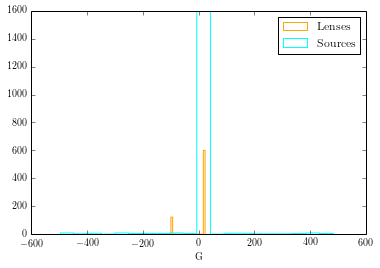

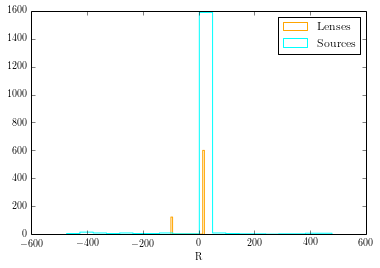

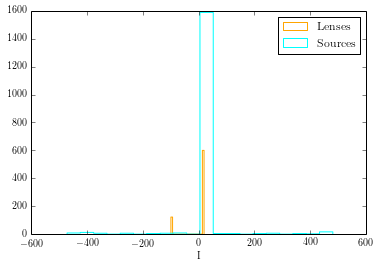

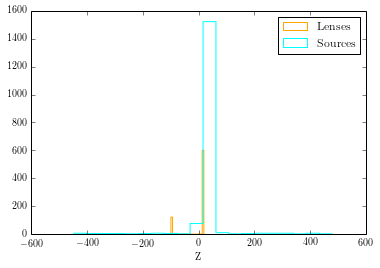

In [13]:
for var in ['G','R','I','Z']:
    plt.figure()
    plt.hist(positioned_cat[var][positioned_cat['XIMG'] == 0],bins=20,histtype='step',color='Orange',label='Lenses')
    plt.hist(positioned_cat[var][positioned_cat['XIMG'] != 0],bins=20,histtype='step',color='Cyan',label='Sources')
    plt.legend()
    plt.xlabel(var)

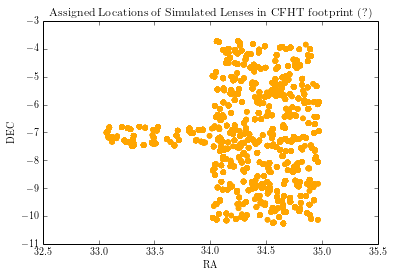

In [25]:
plt.scatter(positioned_cat['RA'],positioned_cat['DEC'],color='Orange')
plt.title('Assigned Locations of Simulated Lenses in CFHT footprint (?)')
plt.xlabel('RA')
plt.ylabel('DEC')

(array([   17.,    58.,   225.,   652.,  1632.,  3109.,  4203.,  3746.,
         1739.,   277.]),
 array([ 13.8852615 ,  15.01993596,  16.15461042,  17.28928488,
         18.42395934,  19.5586338 ,  20.69330826,  21.82798272,
         22.96265718,  24.09733164,  25.2320061 ]),
 <a list of 10 Patch objects>)

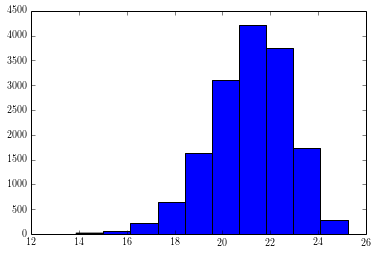

In [40]:
plt.hist(db.lenses['APMAG_I'])

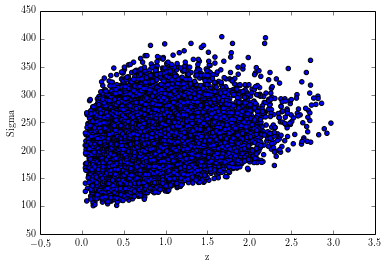

In [47]:
plt.scatter(db.lenses['ZLENS'],db.lenses['VELDISP'])
plt.xlabel('z')
plt.ylabel('Sigma')

In [10]:
from astropy.table import Table
sloan = Table.read('../data/LRGo.txt',format='ascii')
print sloan

   col1      col2       col3       col4    ... col11  col12  col13  col14
---------- -------- ----------- ---------- ... ------ ------ ------ -----
0.08777109 101.4772    29.66101  0.5684491 ...  14.19 13.869 10.882 7.935
0.08915185 119.6037    9.038554   7.443291 ... 13.661 13.513 10.027 8.289
0.08907133 147.3923    7.934169   6.422607 ...   13.4 13.309 10.887 8.071
0.07815439 126.4102    7.423387   9.857728 ... 14.067 13.945 10.701  8.28
0.07330353 88.20443   0.0426188   11.35288 ... 13.257 13.123  9.269 7.541
0.06905825 111.7736    0.478357   0.925322 ... 13.279 13.146 10.043 7.802
0.07845496 101.5035    29.65839    2.14771 ... 14.225  14.16 10.509 8.675
0.09718453 97.15182 0.001023908    6.28618 ... 13.667 13.506 12.078 8.031
0.08647919 140.8284    2.346406   6.159338 ... 13.301 13.532  9.953 7.732
0.09598833 83.64037    1.026456   8.836071 ...  13.39 13.367 10.215 7.662
0.04160196 92.87505 0.001052819   2.211381 ... 13.141 13.133 11.277 7.552
       ...      ...         ...       

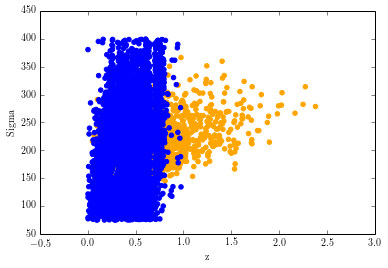

In [11]:
plt.scatter(db.sample['ZLENS'],db.sample['VELDISP'],color='Orange')
plt.scatter(sloan['col1'],sloan['col2'],color='Blue')
plt.xlabel('z')
plt.ylabel('Sigma')